# Beyond Two Variables

We have seen a few ways to summarize and visualize the relationship between two variables. In a few examples, we have also seen some ways of adding a third variable. Now we'll introduce a few more strategies for visualizing higher-dimensional data.

We'll use the Ames housing data set as our example.

In [1]:
import pandas as pd

In [2]:
df_ames = pd.read_csv("https://raw.githubusercontent.com/kevindavisross/data301/main/data/AmesHousing.txt", sep="\t")
df_ames

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


## Using Color and Size

Eaelier we used scatterplots to visualize the relationship between living area and sale price.

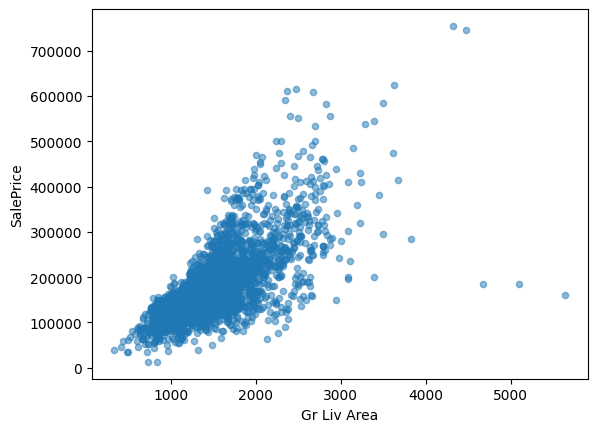

In [3]:
df_ames.plot.scatter(x="Gr Liv Area", y="SalePrice", alpha = 0.5);



What if we also want to investigate how number of bedrooms is involved in this relationship?

One possibility is a three-dimensional scatterplot. However, 3D plots can be misleading on a two dimensional image, and they don't generalize well to even higher dimensions. A better approach is to use other graphical properties, such as the color or size of the points, to represent additional variables.

The `.plot.scatter()` function in `pandas` allows us to control four properties of a scatterplot. We've seen two already:

- `x=`: the variable on the $x$-axis
- `y=`: the variable on the $y$-axis

but there are two more:

- `c=`: the colors of the points (either the name of a variable in the `DataFrame` or an array specifying the color of each point)
- `s=`: the sizes of the points (must be an array specifying the size of each point)

For example, to use color to represent the number of bedrooms ("Bedroom AbvGr"), we could do the following:

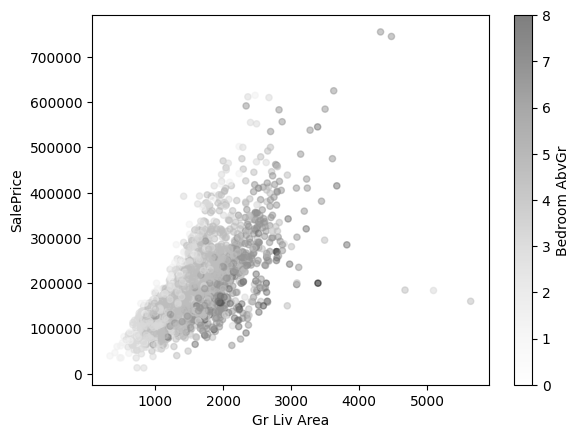

In [4]:
df_ames.plot.scatter(x="Gr Liv Area", y="SalePrice",
                        c="Bedroom AbvGr", alpha=.5);

Choose a particular value of living area, say 2000. Focus on the vertical slice of the scatterplot corresponding to this value of living area. Notice how the colors become darker as you move down the plot. This means that, holding living area constant, a house is less expensive the *more* bedrooms it has. Pause to consider: Why do you think this is?

The number of bedrooms is a quantitative variable (though it is discrete). What if we wanted to visualize how a categorical variable, such as building type, interacts with these two quantitative variables (living area and sale price)? Then we have to manually construct the array of colors using the `.map()` function. (Pandas base plotting is built on the `matplotlib` package. [This link contains some information about colors in matplotlib](https://matplotlib.org/stable/gallery/color/named_colors.html). The code below shows a few ways you can specify colors.)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

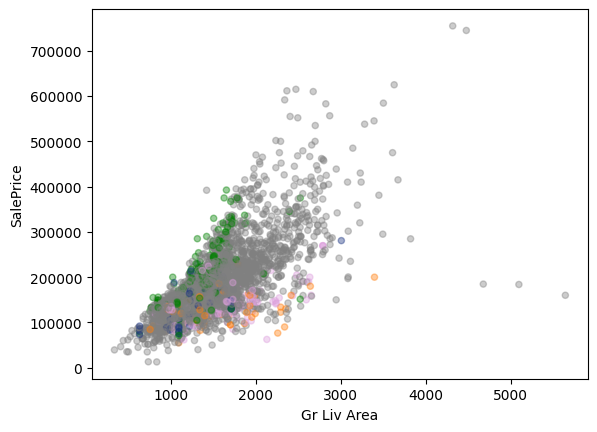

In [5]:
cols = df_ames["Bldg Type"].map({
    "1Fam": "gray", # named color
    "TwnhsE": "g", # color abbreviation for green
    "Twnhs": (0.1, 0.2, 0.5), # RGB color
    "Duplex": "#DDA0DD", # hex color
    "2fmCon": 'tab:orange' # Tableau color
})

df_ames.plot.scatter(x="Gr Liv Area", y="SalePrice",
                        c=cols, alpha=.4)

## Small Multiples

Rather than try to pack all the variables into a single plot, we can juxtapose several plots or "facets", each showing the data from a slightly different angle. Edward Tufte coined the term "small multiples" for this type of graphic.

For example, rather than use color to represent building type, we could have made 5 separate scatterplots, one for each building type, and arranged them in a row for easy comparison.

We construct these 5 scatterplots below from scratch. (Don't worry; we'll see a better way to do this soon!) We need to import some plotting functionality from `matplotlib`, the package upon which the built in Pandas graphics are based.

In [6]:
import matplotlib.pyplot as plt

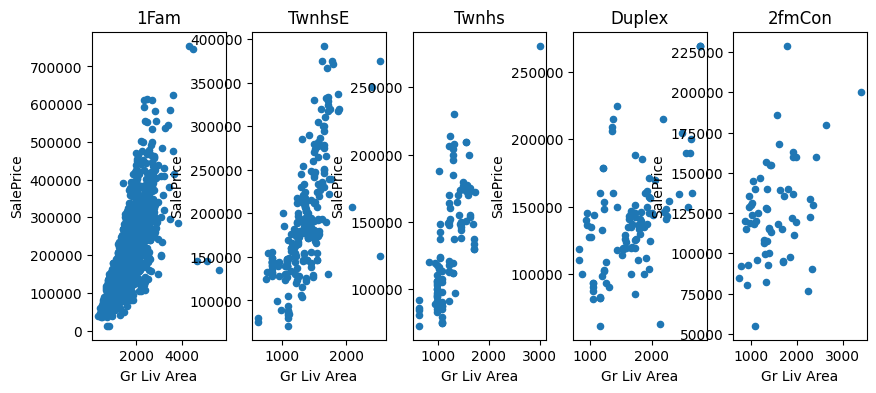

In [7]:
# Specifies a 1 x 5 grid of plots, figsize in inches
fig, axes = plt.subplots(1, 5, figsize=(10, 4))

bldg_types = df_ames["Bldg Type"].unique()
for ax, bldg_type in zip(axes, bldg_types):
    (df_ames[df_ames["Bldg Type"] == bldg_type].plot.scatter(x="Gr Liv Area", y="SalePrice", ax=ax))
    ax.set_title(bldg_type)

Of course, the goal of such a graphic is to facilitate comparison, which is difficult when the $x$- and $y$-axes of the facets are so different. Since the facets are aligned horizontally, it makes sense to use a common $y$-axis for all of them. We can do this by specifying `sharey=True` in `plt.subplots()`. (There is also a corresponding `sharex=` argument.)

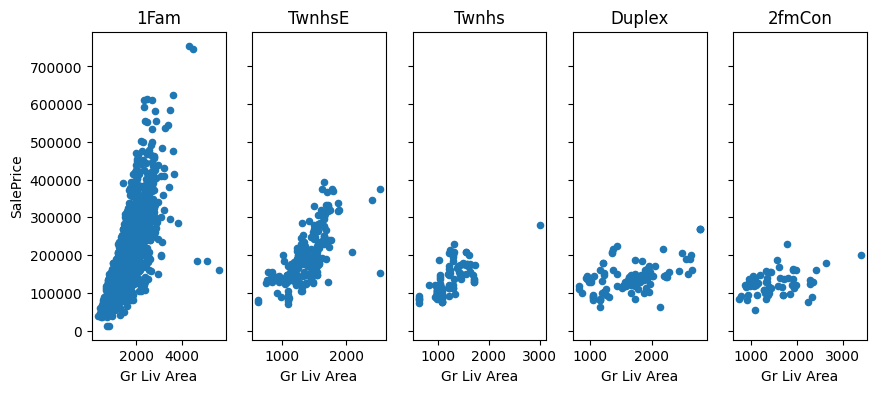

In [8]:
# Specifies a 1 x 5 grid of plots, figsize in inches
fig, axes = plt.subplots(1, 5, figsize=(10, 4), sharey=True)

bldg_types = df_ames["Bldg Type"].unique()
for ax, bldg_type in zip(axes, bldg_types):
    (df_ames[df_ames["Bldg Type"] == bldg_type].
     plot.scatter(x="Gr Liv Area", y="SalePrice", ax=ax))
    ax.set_title(bldg_type)

Sharing the $y$-axes between the facets also resolved another issue---the colliding $y$-axis labels---since now only the first plot in the figure has an $y$-axis label.

Pandas provides some relatively quick and easy plots for visualizing 1 or 2 variables. Unfortunately, it's not ideal for highly multivariate data. We'll explore some other Python packages for data visualization soon!